In [1]:
# 1. Perform classification analysis to predict how many people survived the titanic disaster
#    using Logistic regression for the given dataset.
# 2. Also plot visuals by using Matplotlib/Seaborn data visualization comparing the different
#    features of the input parameters and do Exploratory data analysis (EDA) by using
#    pandas.

In [2]:
import pandas as pd
main_file = pd.read_csv("train.csv")

In [3]:
main_file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
main_file.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
main_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


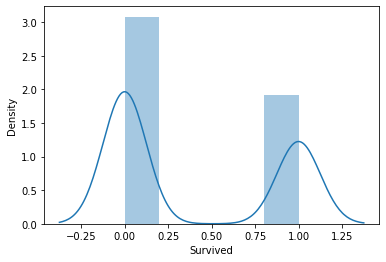

In [6]:
# performing EDA\
import seaborn as sb
sb.distplot(main_file["Survived"])

In [8]:
main_file.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
survivor_numeric = main_file.select_dtypes(include=["float64","int64"])
# as numpy cannot work on non numeric data hence we will clean the non required columns

In [9]:
survivor_numeric

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,1,19.0,0,0,30.0000,0.0
888,889,0,3,1,NaN,1,2,23.4500,0.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [11]:
X = main_file.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = main_file['Survived']

In [12]:
print(X)


     Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
0         3    0  22.0      1      0   7.2500   NaN       0.0
1         1    1  38.0      1      0  71.2833   C85       1.0
2         3    1  26.0      0      0   7.9250   NaN       0.0
3         1    1  35.0      1      0  53.1000  C123       0.0
4         3    0  35.0      0      0   8.0500   NaN       0.0
..      ...  ...   ...    ...    ...      ...   ...       ...
886       2    0  27.0      0      0  13.0000   NaN       0.0
887       1    1  19.0      0      0  30.0000   B42       0.0
888       3    1   NaN      1      2  23.4500   NaN       0.0
889       1    0  26.0      0      0  30.0000  C148       1.0
890       3    0  32.0      0      0   7.7500   NaN       2.0

[891 rows x 8 columns]


In [13]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


In [18]:
model = LogisticRegression()

In [19]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

ValueError: ignored